In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from pathlib import Path

In [20]:
DATA_PATH = r"C:\Users\jkk\OneDrive\Desktop\rag-complaint-chatbot\data\raw\complaints.csv"

from pathlib import Path

# Check if the file exists before loading
if Path(DATA_PATH).exists():
	df = pd.read_csv(DATA_PATH, encoding='latin1')
	display(df.head())
else:
	print(f"File not found: {DATA_PATH}. Please make sure the file exists.")
	df = pd.DataFrame()  # Create an empty DataFrame to avoid further errors


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [21]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [22]:
print("Loading CFPB complaint data...")

Loading CFPB complaint data...


In [23]:
df.columns = (
    df.columns
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("?", "", regex=False)
)

df.columns


Index(['date_received', 'product', 'sub-product', 'issue', 'sub-issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id'],
      dtype='object')

In [24]:
df = df[
    [
        "complaint_id",
        "date_received",
        "product",
        "sub-product",
        "issue",
        "sub-issue",
        "consumer_complaint_narrative",
        "company",
        "state"
    ]
]


In [25]:
valid_products = [
    "Credit card",
    "Personal loan",
    "Savings account",
    "Money transfer"
]

df = df[df["product"].isin(valid_products)]
df.shape


(226686, 9)

In [26]:
df = df.dropna(subset=["consumer_complaint_narrative"])
df.shape


(80667, 9)

In [27]:
df["product"].value_counts()


product
Credit card    80667
Name: count, dtype: int64

In [28]:
sample_lengths = (
    df["consumer_complaint_narrative"]
    .sample(50_000, random_state=42)
    .str.split()
    .str.len()
)

sample_lengths.describe()


count    50000.000000
mean       200.261360
std        226.234668
min          2.000000
25%         63.000000
50%        141.000000
75%        260.000000
max       6469.000000
Name: consumer_complaint_narrative, dtype: float64

In [29]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text


In [30]:
df["clean_text"] = df["consumer_complaint_narrative"].apply(clean_text)


In [31]:
output_path = r"C:\Users\jkk\OneDrive\Desktop\rag-complaint-chatbot\data\processed\filtered_complaints.csv"
df.to_csv(output_path, index=False)


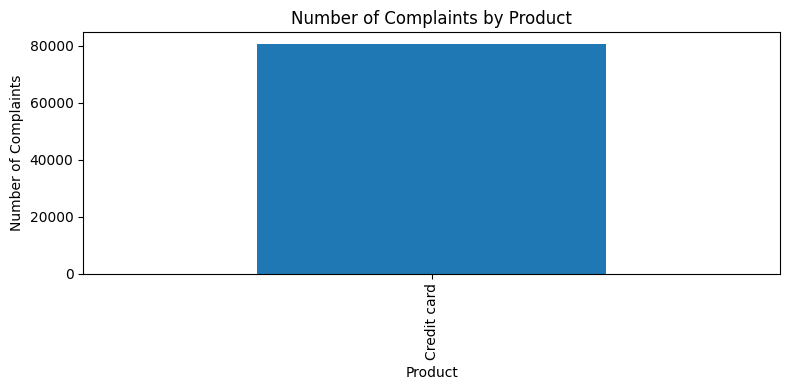

In [32]:
import matplotlib.pyplot as plt

product_counts = df["product"].value_counts()

plt.figure(figsize=(8,4))
product_counts.plot(kind="bar")
plt.title("Number of Complaints by Product")
plt.xlabel("Product")
plt.ylabel("Number of Complaints")
plt.tight_layout()
plt.show()
df = pd.read_csv(
    r"C:\Users\jkk\OneDrive\Desktop\rag-complaint-chatbot\data\processed\filtered_complaints.csv"
)

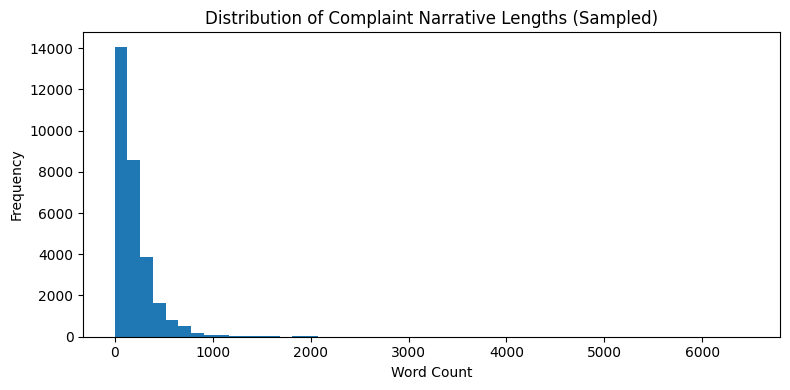

In [33]:
sample_lengths = (
    df["consumer_complaint_narrative"]
    .sample(30_000, random_state=42)
    .str.split()
    .str.len()
)

plt.figure(figsize=(8,4))
plt.hist(sample_lengths, bins=50)
plt.title("Distribution of Complaint Narrative Lengths (Sampled)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
